<a href="https://colab.research.google.com/github/alostmathematician/ISTA-366/blob/main/ISTA_322_Sp23_HW2_part_1_qin_xu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW2 - Part 1: Movies!




# Reminder about Submission Instructions

1) First create a copy of this notebook in your drive and rename it so that it contains the course number (ISTA322), the semester (Sp22 for Spring 2022, Su22 for Summer 2022, and Fa22 for Fall 2022), the assigment code (HW2 for this assignment) and your name.

    e.g. my copy for Spring 2023 would be ISTA_322_Sp23_HW2_part_1_dan_charbonneau)

2) When you are ready to submit. Prepare three files: the python file (File->Download->Download .py), the notebook file (File->Download->Download .ipynb), and PDF version of your notebook (after running all cells). Note: you can take a screenshot and create the pdf out of them.

3) Create a new directory named firstname_lastname_hw1 (e.g my directory would be dan_charbonneau_hw2_part1) put all three files in it. Compress (Zip) the folder you created with the files inside of it and submit this .zip file to D2L.

**incorrect filenames or submission formats will result in a loss of 50% of your grade**

## Wranging and aggregating movie review data

The website MovieLens.com has a research group which provides open access to millions of reviews, for free!  We're going to work with those data for this homework.  [Feel free to check out the website here.](https://grouplens.org/datasets/movielens/)  You can go and download the raw data, but in order to make things a bit easier, the files have been uploaded the Google drive for fast direct downloads.  

There are two datasets we'll be working with.
* movies - this is a file of 60,000+ movies
* reviews - this is a file of 25 *million* individual reviews for the 60k movies

The goal for this section of the homework is to do two types of data aggregations that will allow for someone to make inferences on which movies were the most popular, reviewed, polarizing and were cult classics.  

To do this we'll first start by making a simple data set that brings just overall review properties together with movies.  We'll then do some deeper groupings to create a dataset that looks at the same properties but over time.

### Data first

Let's bring in our two files and libraries.  The ratings file is understandably large.  So it's a good idea to download it and then save a copy as something else and work with that.  This way if you mess up you don't have to download it all over again


In [2]:
# Libraries
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



In [3]:
# Movies data
movies = pd.read_csv('https://itsa322.s3.us-east-2.amazonaws.com/movies.csv')

In [4]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [5]:
# Ratings data
ratings = pd.read_csv('https://itsa322.s3.us-east-2.amazonaws.com/ratings.csv')
# ratings = pd.read_csv('ratings.csv')

In [6]:
# save the file for future reference
ratings.to_csv('ratings.csv', index=False)

In [7]:
# Make a copy of ratings; Generally, it's good practice to keep original copies saved before starting to mess with them
# Also if you want to re-do some of the cells you can use rating_backup instead of loading data from servers!
ratings_backup = ratings.copy

## Q1 Explore your data - [3 points]

Below take some time to explore your date.  
In one cell, check the following items for **both** datasets:

* Head and tail
* Shape
* Datatypes

In a new cell:
* The total number of NaN values for the movies and ratings tables (a single value for each table)

**Task** Do the head,tail, and shape operations all in one cell.  Count the number of NaNs in another.

In [8]:
## Q1 Your code starts here
# shape of movies
print("movies shape:", movies.shape);


movies shape: (62423, 3)


In [9]:
#head of movies
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [10]:
#tail of movies
movies.tail()

,movieId,title,genres
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)
62422,209171,Women of Devil's Island (1962),Action|Adventure|Drama


In [11]:
# Get the total count of NaNs for movies
number_of_NaNs_in_movies = movies.isna().sum().sum() #replace 0 here with your code calculating the NaNs. Variable should be an int
print("Number of NaNs in movies:", number_of_NaNs_in_movies)

Number of NaNs in movies: 0


In [12]:
#Do the same steps for shape, head, and tail, and NaNs of ratings
print(f"ratings shape: {ratings.shape}")
print(f"ratings head:\n{ratings.head()}")
print(f"ratings tail:\n{ratings.tail()}")

number_of_NaNs_in_ratings = ratings.isna().sum().sum() #replace 0 here with your code calculating the NaNs
print("Number of NaNs in ratings:", number_of_NaNs_in_ratings)
## Q1 Your code ends here - Any code outside of these start/end markers won't be graded

ratings shape: (25000095, 4)
ratings head:
   userId  movieId  rating   timestamp
0       1      296     5.0  1147880044
1       1      306     3.5  1147868817
2       1      307     5.0  1147868828
3       1      665     5.0  1147878820
4       1      899     3.5  1147868510
ratings tail:
          userId  movieId  rating   timestamp
25000090  162541    50872     4.5  1240953372
25000091  162541    55768     2.5  1240951998
25000092  162541    56176     2.0  1240950697
25000093  162541    58559     4.0  1240953434
25000094  162541    63876     5.0  1240952515
Number of NaNs in ratings: 0


## Q2 Convert timestamp in ratings to a datetime. - [1.5 points]

One issue that you can see from your exploration is that the ratings only have a timestamp.  This timestamp is measured in the number of seconds since 00:00:00 on January 1st, 1970.  You'll need to convert this to a datetime in order to actually do our later data aggregations.  

You use `pd.to_datetime` on timestamps like this.  [For full details on the various ways to use this function please look at the Pandas documentation.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) Briefly, this is how it's used.

```
>>> pd.to_datetime(1490195805, unit='s')
Timestamp('2017-03-22 15:16:45')
```

**Task** Make a new column in the movies dataframe called `review_dt` that contains the data from the timestamp column but converted to a datetime datatype.  

Note, it's good practice to do this by first assigning the output to a test vector first, rather than directly adding the output to the dataframe. This allows you to make sure your operation did what you wanted before modifying your dataframe. Once you're confident of the output, you can assign the vector to the `reviews` dataframe as a new column.

For example
```
test_vec = pd.to_datetime(arguments)
test_vec # to check what it contains
```

In [13]:
## Q2 Your code starts here
# Make test vector
test_vec = pd.to_datetime(ratings['timestamp'], unit='s')

In [14]:
# Check vector and datatype to make sure it make sense.
test_vec

0          2006-05-17 15:34:04
1          2006-05-17 12:26:57
2          2006-05-17 12:27:08
3          2006-05-17 15:13:40
4          2006-05-17 12:21:50
                   ...        
25000090   2009-04-28 21:16:12
25000091   2009-04-28 20:53:18
25000092   2009-04-28 20:31:37
25000093   2009-04-28 21:17:14
25000094   2009-04-28 21:01:55
Name: timestamp, Length: 25000095, dtype: datetime64[ns]

In [15]:
# Now add this to the ratings dataframe
ratings['review_dt'] = test_vec

In [16]:
# Check the head of your dataframe again
ratings.head()

,userId,movieId,rating,timestamp,review_dt
0,1,296,5.0,1147880044,2006-05-17 15:34:04
1,1,306,3.5,1147868817,2006-05-17 12:26:57
2,1,307,5.0,1147868828,2006-05-17 12:27:08
3,1,665,5.0,1147878820,2006-05-17 15:13:40
4,1,899,3.5,1147868510,2006-05-17 12:21:50


In [17]:
# What's the oldest and newest review?  It should be 1995-01-09 and 2019-11-21, respectively.
print(f"oldest review: {ratings['review_dt'].min().date()}")
print(f"newest review: {ratings['review_dt'].max().date()}")
## Q2 Your code ends here - Any code outside of these start/end markers won't be graded

oldest review: 1995-01-09
newest review: 2019-11-21


## Q3 Your first aggregation and join - [4.5 points]

The first aggregation and join I want you to do is at the whole movie level.  Your movies dataframe should only have a single row for each movie, but there are obviously thousands of individual reviews for each of those movies. Our goal here is to produce some summary statistics about the reviews for each movie and then join them to the movies dataframe.

**Task:** Do the following:
* Create an aggregated dataframe called `ratings_by_movie`. This dataframe should be grouped by movie. Use `.agg()` to calculate the mean, standard deviation ('std'), and the number of reviews for each movie.  
* Rename the columns of that dataframe `'movieId', 'rating_mean', 'rating_std', and 'rating_count'`
* Join this new `ratings_by_movie` dataframe such that it attaches all those summary statistics to their corresponding movies from the 'movies' dataframe.
* Call the joined dataframe `movies_with_ratings`

In [18]:
## Q3 Your code starts here
# Make ratings_by_movie
ratings_by_movie = ratings.groupby('movieId', as_index=False).agg(
    {'rating':['mean','std','count']}
    )

In [19]:
# Check it
ratings_by_movie

movieId    rating                 
                   mean       std  count
0           1  3.893708  0.921552  57309
1           2  3.251527  0.959851  24228
2           3  3.142028  1.008443  11804
3           4  2.853547  1.108531   2523
4           5  3.058434  0.996611  11714
...       ...       ...       ...    ...
59042  209157  1.500000       NaN      1
59043  209159  3.000000       NaN      1
59044  209163  4.500000       NaN      1
59045  209169  3.000000       NaN      1
59046  209171  3.000000       NaN      1

[59047 rows x 4 columns]

In [20]:
# Rename columns
ratings_by_movie.columns = ['movieId','rating_mean','rating_std','rating_count']

In [21]:
# Join it and call movies with ratings
movies_with_ratings = movies.merge(ratings_by_movie,on="movieId",how='left')

In [22]:
# Check movies_with_ratings.
movies_with_ratings
## Q3 Your code ends here - Any code outside of these start/end markers won't be graded

,movieId,title,genres,rating_mean,rating_std,rating_count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708,0.921552,57309.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.251527,0.959851,24228.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.142028,1.008443,11804.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.853547,1.108531,2523.0
4,5,Father of the Bride Part II (1995),Comedy,3.058434,0.996611,11714.0
...,...,...,...,...,...,...
62418,209157,We (2018),Drama,1.500000,NaN,1.0
62419,209159,Window of the Soul (2001),Documentary,3.000000,NaN,1.0
62420,209163,Bad Poems (2018),Comedy|Drama,4.500000,NaN,1.0
62421,209169,A Girl Thing (2001),(no genres listed),3.000000,NaN,1.0


Is your merged dataframe 62423 rows × 6 columns?

## Q4 Filtering and more transformations - [3 points]

Now we want to clean up this dataset a bit and then do a couple more transforms. One issue you can see from your check above is that many movies only have one rating.  We're going to choose to set a minimum number of reviews needed to be included.  We also want to do some binning where movies with certain ratings levels

**Task:** Please do the following operations
* Filter `movies_with_ratings` so it only contains movies that have at least 10 ratings
* Use the function `cut()` to automatically bin our `rating_mean` column into three groups of 'bad', 'fine', or 'good' movies.  Call this `rating_group`.
* Use the same function to take the standard deviation in rating and make three groups of 'agreement', 'average', 'controversial'.  Thus, movies with low standard deviation have agreement in the rating, while movies with high standard deviation have controversy in the ratings.  Call this column `ratings_agreement`.

In [23]:
## Q4 part 1 Your code starts here
# Filter first being sure to overwrite dataframe
movies_with_ratings = movies_with_ratings[movies_with_ratings['rating_count'] >= 10]

In [24]:
# Check how many rows you're left with. You should have a little over 24000
len(movies_with_ratings)
## Q4 part 1 Your code ends here - Any code outside of these start/end markers won't be graded

24330

I didn't show you how to use `cut()` in the lesson, but it's a transform just like anything else.  You could use a `np.where()` statement like we did, but `cut()` is a bit easier.  All it does is take 1) a column as the first argument, 2) the number of bins you want to group it in as the second argument, and then 3) the labels you want to give those bins as the third.  It automatically divides them up into equal sized bins.

For example, if I make the following list:
```
rating = [2, 4, 9, 8, 5, 3, 6, 10, 2, 1, 6, 7]
```

And run `cut()` on it with three bins and levels 'bad', 'fine', and 'good':
```
pd.cut(rating, 3, labels=['bad', 'fine', 'good'])
```

I get a return of:
```
[bad, bad, good, good, fine, ..., good, bad, bad, fine, fine]
Length: 12
Categories (3, object): [bad < fine < good]
```

Note how it orders them for you based on the order of the labels.  

In [25]:
# If you want to test it!
rating = [2, 4, 9, 8, 5, 3, 6, 10, 2, 1, 6, 7]
pd.cut(rating, 3, labels=['bad', 'fine', 'good'])

['bad', 'bad', 'good', 'good', 'fine', ..., 'good', 'bad', 'bad', 'fine', 'fine']
Length: 12
Categories (3, object): ['bad' < 'fine' < 'good']

Note: if get a SettingWithCopyWarning that's ok here.
Pandas tries to warn us that we are working with a copy of movies_with_rating,
and the changes won't reflace back to the original movies_with_rating dataframe. But that's ok for us

In [26]:
## Q4 part 2 Your code starts here
# Now make 'bad', 'fine', 'good' levels for ratings
# Assign to new column called 'rating_group'

movies_with_ratings['rating_group'] = pd.cut(
    movies_with_ratings['rating_mean'], 
    3, 
    labels=['bad', 'fine', 'good']
    )

/tmp/ipykernel_26070/263545949.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_with_ratings['rating_group'] = pd.cut(


In [27]:
# Check it
movies_with_ratings

,movieId,title,genres,rating_mean,rating_std,rating_count,rating_group
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708,0.921552,57309.0,good
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.251527,0.959851,24228.0,good
2,3,Grumpier Old Men (1995),Comedy|Romance,3.142028,1.008443,11804.0,fine
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.853547,1.108531,2523.0,fine
4,5,Father of the Bride Part II (1995),Comedy,3.058434,0.996611,11714.0,fine
...,...,...,...,...,...,...,...
61967,207405,Doctor Sleep (2019),Horror,3.730769,0.785109,39.0,good
62027,207612,Tell Me Who I Am (2019),Documentary,3.357143,1.099450,14.0,good
62088,207830,Terminator: Dark Fate (2019),Action|Sci-Fi,3.372727,0.794764,55.0,good
62313,208715,Let It Snow (2019),Comedy|Romance,2.933333,1.222799,15.0,fine


Do Toy Story and Jumanji have 'good' ratings?  Does Grumpier Old Men have a 'fair' rating?

In [28]:
# Now use cut() again to create your ratings_agreement column.
# Use three bins and order of 'agreement', 'average',  and 'controversial'
movies_with_ratings['rating_agreement'] = pd.cut(
    movies_with_ratings['rating_std'], 
    3, 
    labels=['agreement', 'average', 'controversial']
    )

/tmp/ipykernel_26070/2632043157.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_with_ratings['rating_agreement'] = pd.cut(


In [49]:
# Check to make sure that your bin categories make sense. e.g. 'good' movies should have higher ratings than 'fine', 'controversial' movies should ... ?
mean_min = movies_with_ratings.groupby('rating_group').apply(lambda x: x['rating_mean'].min())
mean_max = movies_with_ratings.groupby('rating_group').apply(lambda x: x['rating_mean'].max())
print(mean_min)
print(mean_max)

std_min = movies_with_ratings.groupby('rating_agreement').apply(lambda x: x['rating_std'].min())
std_max = movies_with_ratings.groupby('rating_agreement').apply(lambda x: x['rating_std'].max())

print(std_min)
print(std_max)
## Q4 part 2 Your code ends here - Any code outside of these start/end markers won't be graded

rating_group
bad     0.678571
fine    1.946970
good    3.215035
dtype: float64
rating_group
bad     1.943946
fine    3.214552
good    4.483096
dtype: float64
rating_agreement
agreement        0.000000
average          0.690497
controversial    1.381137
dtype: float64
rating_agreement
agreement        0.690378
average          1.380733
controversial    2.071382
dtype: float64


###  Exploring our data

Making bins like this allows us to figure out things like which movies are both bad, but have differing opinions on.  For example, we can filter out movies that are in the bad category but have a lot of controversy about those ratings.  This could mean they're 'cult classic' movies where despite the low rating some people actually really love the movies.  

A dataset like this could be used in a recommendation engine where if you see people liking these 'bad but good' movies you could suggest others that meet the came criteria.  

**Task:** There are no points here - only code to let you make figures to see what the dataset could be used for. Also, if this code works it means you probably did your answers above are right :)

In [30]:
movies_with_ratings[(movies_with_ratings['rating_group'] == 'bad') &
                    (movies_with_ratings['rating_agreement'] == 'controversial') &
                    (movies_with_ratings['rating_count'] >= 100)]

,movieId,title,genres,rating_mean,rating_std,rating_count,rating_group,rating_agreement
8618,26157,Manos: The Hands of Fate (1966),Horror,1.798165,1.550268,109.0,bad,controversial
16964,89281,Birdemic: Shock and Terror (2010),Romance|Thriller,1.521739,1.503492,115.0,bad,controversial


If you have done everything correctly so far, you will get:
The Hands of Fate (1966)	Horror and	Birdemic: Shock and Terror (2010)	as the outcome.


## Q5 Grouping within years - [3 point]

Now that we've done our overall grouping by movie, let's get a bit more detail about these ratings. Specifically, let's engineer a dataset that breaks down the average rating not only by movie, but also by the year the person provided the review.  This would allow for someone to see which movies continue to do well over time, which ones become more popular, and which ones don't age well!

**Task:** You're going to do the following steps:
* Create a new `ratings_by_movie_year` that groups both by `movieId` but also by your `review_dt` column.  I want you to group into year intervals.  
* Join `movies` to `ratings_by_movie_year` so that you have the summary review statistics for each year the movie has been out
* Clean up and filter your dataframe

First, create `ratings_by_movie_year`.  You can group by two levels by just adding a list of what levels you want to group by in the `groupby()` statement.  I'll give you some help there, but you have to complete the rest in order to group by movieId first and review_dt second.

In [31]:
# Note the groupby syntax.  I first am grouping by movieId
# But then also am calling dt.year on our datetime column
# This will then tell Python to do the aggregations within year as well

## Q5 Your code starts here
ratings_by_movie_year = ratings.groupby(
    ['movieId', ratings['review_dt'].dt.year]).agg(
        {'rating': ['mean','std','count']}
    )

In [32]:
# Check
ratings_by_movie_year.head()

rating                
                       mean       std count
movieId review_dt                          
1       1996       4.132756  0.884990  6237
        1997       3.872500  0.894079  6000
        1998       3.889515  0.944972   887
        1999       3.975140  0.913960  2494
        2000       4.136634  0.865127  3535

You need to rename columns, but this is a bit trickier as you have two levels of your dataframe index. I'm going to give you the code below.  But, what it's doing is resetting that one level of the index `review_dt` and putting it back as a regular column.  I'm then renaming the resulting columns.

In [33]:
# Reset index (you cannot rerun this cell (or any cell that includes reset_index) twice unless you re-create ratings_by_movie_year)
ratings_by_movie_year = ratings_by_movie_year.reset_index(level = 'review_dt')
ratings_by_movie_year.columns = ['year', 'rating_mean', 'rating_std', 'rating_count']
ratings_by_movie_year

,year,rating_mean,rating_std,rating_count
movieId,,,,
1,1996,4.132756,0.884990,6237
1,1997,3.872500,0.894079,6000
1,1998,3.889515,0.944972,887
1,1999,3.975140,0.913960,2494
1,2000,4.136634,0.865127,3535
...,...,...,...,...
209157,2019,1.500000,NaN,1
209159,2019,3.000000,NaN,1
209163,2019,4.500000,NaN,1


In [34]:
# Now join the movie dataframe onto ratings_by_movie_year. Think about the type/direction of your join (left, right, inner, outer, cross)
# and how that will affect what data will be kept and what data will be dropped. Think about what makes most sense, if you'll end up with a bunch of extra NAs for data
# that don't have corresponding data in the other table, etc
ratings_by_movie_year  = ratings_by_movie_year.merge(movies, how='left', on='movieId')


In [35]:
# Check
ratings_by_movie_year

,movieId,year,rating_mean,rating_std,rating_count,title,genres
0,1,1996,4.132756,0.884990,6237,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,1997,3.872500,0.894079,6000,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,1,1998,3.889515,0.944972,887,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,1,1999,3.975140,0.913960,2494,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,1,2000,4.136634,0.865127,3535,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...,...
323732,209157,2019,1.500000,NaN,1,We (2018),Drama
323733,209159,2019,3.000000,NaN,1,Window of the Soul (2001),Documentary
323734,209163,2019,4.500000,NaN,1,Bad Poems (2018),Comedy|Drama
323735,209169,2019,3.000000,NaN,1,A Girl Thing (2001),(no genres listed)


In [36]:
# How many rows are there in the resulting dataframe?
len(ratings_by_movie_year)
## Q5 Your code ends here - Any code outside of these start/end markers won't be graded

323737

In your dataframe do you see Toy Story having a mean rating of 4.132756 in 1996?  Is your dataframe 323737 rows × 7 columns?

### A quick plot

Now you have a dataset where one could explore how movies have done over time. I've made a couple plots below to show you want I mean.

In [37]:
# What movie has the max rating?
movies_with_ratings.loc[movies_with_ratings['rating_count'] == movies_with_ratings['rating_count'].max()]

,movieId,title,genres,rating_mean,rating_std,rating_count,rating_group,rating_agreement
351,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.048011,0.93881,81491.0,good,average



If you have done everything correctly you should get Forrest Gump (1994)

In [38]:
# Grabbing just the ID for that movie.
movies_with_ratings['movieId'][movies_with_ratings['rating_count'] == movies_with_ratings['rating_count'].max()].values[0]

356

In [39]:
# Forest gump has been reviewed over 80000 times!
# Let's extract that movie id to an object and then make just that dataframe
most_viewed_id = movies_with_ratings['movieId'][movies_with_ratings['rating_count'] == movies_with_ratings['rating_count'].max()].values[0]

most_viewed_df = ratings_by_movie_year[ratings_by_movie_year['movieId'] == most_viewed_id]
most_viewed_df

,movieId,year,rating_mean,rating_std,rating_count,title,genres
7927,356,1996,4.120873,0.931022,15264,Forrest Gump (1994),Comedy|Drama|Romance|War
7928,356,1997,4.085352,0.919867,1816,Forrest Gump (1994),Comedy|Drama|Romance|War
7929,356,1998,4.093245,1.046018,1051,Forrest Gump (1994),Comedy|Drama|Romance|War
7930,356,1999,3.787516,1.163514,3172,Forrest Gump (1994),Comedy|Drama|Romance|War
7931,356,2000,4.027959,1.051722,3827,Forrest Gump (1994),Comedy|Drama|Romance|War
7932,356,2001,4.119985,0.993906,2667,Forrest Gump (1994),Comedy|Drama|Romance|War
7933,356,2002,3.981262,1.014716,1601,Forrest Gump (1994),Comedy|Drama|Romance|War
7934,356,2003,3.973144,0.973239,1657,Forrest Gump (1994),Comedy|Drama|Romance|War
7935,356,2004,3.878659,0.951275,2596,Forrest Gump (1994),Comedy|Drama|Romance|War
7936,356,2005,3.834838,0.953641,3987,Forrest Gump (1994),Comedy|Drama|Romance|War


<Axes: xlabel='year', ylabel='rating_mean'>

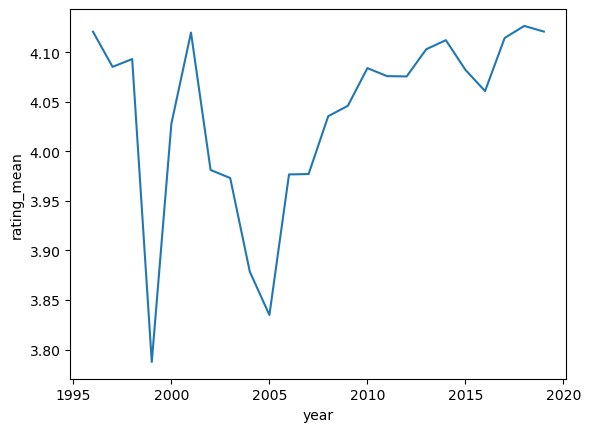

In [40]:
#  A quick lineplot shows that although forest gump has a really high rating on average, it seems to have some bad years for some reason.
sns.lineplot(data = most_viewed_df, x = 'year', y = 'rating_mean')

You can also look up some of your favorite movies.  I actually love the movie 'Dredd', even though many people hated it.  We can search in the titles for movies we like, and then call that ID to filter a new dataframe.  We can then make some plots

In [41]:
# Search for Dredd
movies_with_ratings[movies_with_ratings['title'].str.contains('Dredd')]

,movieId,title,genres,rating_mean,rating_std,rating_count,rating_group,rating_agreement
171,173,Judge Dredd (1995),Action|Crime|Sci-Fi,2.555360,1.039140,14758.0,fine,average
18491,96737,Dredd (2012),Action|Sci-Fi,3.569671,0.981699,3495.0,good,average


In [42]:
# Call the dredd to make a dataframe
dredd_id = movies_with_ratings['movieId'][movies_with_ratings['title'].str.contains('^Dredd')].values[0]
dredd_df = ratings_by_movie_year[ratings_by_movie_year['movieId'] == dredd_id]
dredd_df

,movieId,year,rating_mean,rating_std,rating_count,title,genres
226314,96737,2012,3.707317,0.702514,82,Dredd (2012),Action|Sci-Fi
226315,96737,2013,3.456989,0.832099,279,Dredd (2012),Action|Sci-Fi
226316,96737,2014,3.496667,0.947439,150,Dredd (2012),Action|Sci-Fi
226317,96737,2015,3.543118,1.017194,603,Dredd (2012),Action|Sci-Fi
226318,96737,2016,3.576220,1.004333,656,Dredd (2012),Action|Sci-Fi
226319,96737,2017,3.552011,1.030304,721,Dredd (2012),Action|Sci-Fi
226320,96737,2018,3.571839,0.964888,522,Dredd (2012),Action|Sci-Fi
226321,96737,2019,3.682573,0.973061,482,Dredd (2012),Action|Sci-Fi


<Axes: xlabel='year', ylabel='rating_mean'>

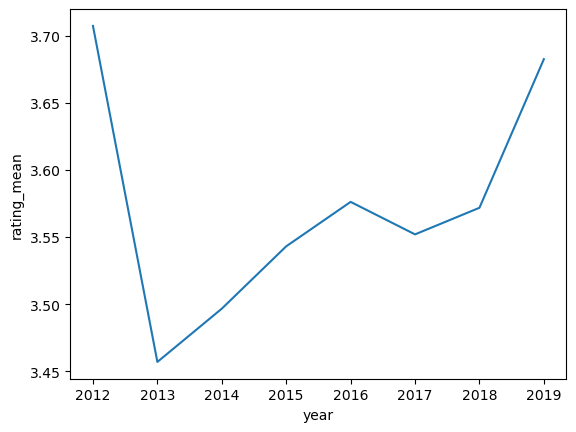

In [43]:
# Our plot shows that the year after release it was reviewed pretty poorly,
# but the score gradually grew as people realized how awesome it was :)
sns.lineplot(x = 'year', y = 'rating_mean', data = dredd_df)